##Importing libraries

In [81]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.impute import KNNImputer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import LearningCurveDisplay
from sklearn.metrics import classification_report,confusion_matrix,roc_curve, auc

## Loading the data

In [82]:
Train=pd.read_excel('/content/drive/MyDrive/DAL dataset/Assignment 2/train.xlsx')
Test=pd.read_excel('/content/drive/MyDrive/DAL dataset/Assignment 2/test.xlsx')

In [83]:
Train.describe()# Get the statistical information on Data

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


##Preliminary study on the data

In [84]:
Train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [85]:
Train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Has Age and Cabin  column missing entries. Because the data is really small dropping the columns are respective rows is not a good idea. We will try some imputation.

In [86]:
# check missing values in train data
Train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [87]:
#Get the column names
Train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [88]:
Train['Pclass'].unique()# can be treated as categorical data, will be handled by One Hot Encoding

array([3, 1, 2])

In [89]:
Train['SibSp'].unique()

array([1, 0, 3, 4, 2, 5, 8])

In [90]:
Train['Parch'].unique()

array([0, 1, 2, 5, 3, 4, 6])

In [91]:
Train['Embarked'].unique()#can be handled by OHE once missing values are replaced

array(['S', 'C', 'Q', nan], dtype=object)

In [92]:
Train['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [93]:
Train['Ticket'].unique()#useless data. it can't give any insight regarding the prediction

array(['A/5 21171', 'PC 17599', 'STON/O2. 3101282', 113803, 373450,
       330877, 17463, 349909, 347742, 237736, 'PP 9549', 113783,
       'A/5. 2151', 347082, 350406, 248706, 382652, 244373, 345763, 2649,
       239865, 248698, 330923, 113788, 347077, 2631, 19950, 330959,
       349216, 'PC 17601', 'PC 17569', 335677, 'C.A. 24579', 'PC 17604',
       113789, 2677, 'A./5. 2152', 345764, 2651, 7546, 11668, 349253,
       'SC/Paris 2123', 330958, 'S.C./A.4. 23567', 370371, 14311, 2662,
       349237, 3101295, 'A/4. 39886', 'PC 17572', 2926, 113509, 19947,
       'C.A. 31026', 2697, 'C.A. 34651', 'CA 2144', 2669, 113572, 36973,
       347088, 'PC 17605', 2661, 'C.A. 29395', 'S.P. 3464', 3101281,
       315151, 'C.A. 33111', 'S.O.C. 14879', 2680, 1601, 348123, 349208,
       374746, 248738, 364516, 345767, 345779, 330932, 113059,
       'SO/C 14885', 3101278, 'W./C. 6608', 'SOTON/OQ 392086', 343275,
       343276, 347466, 'W.E.P. 5734', 'C.A. 2315', 364500, 374910,
       'PC 17754', 'PC 

#Exploratory Data Analysis

In [94]:
#Dropping ID and Name columns and Ticket
ID=Train.pop('PassengerId')
Name=Train.pop('Name')
Ticket=Train.pop('Ticket')

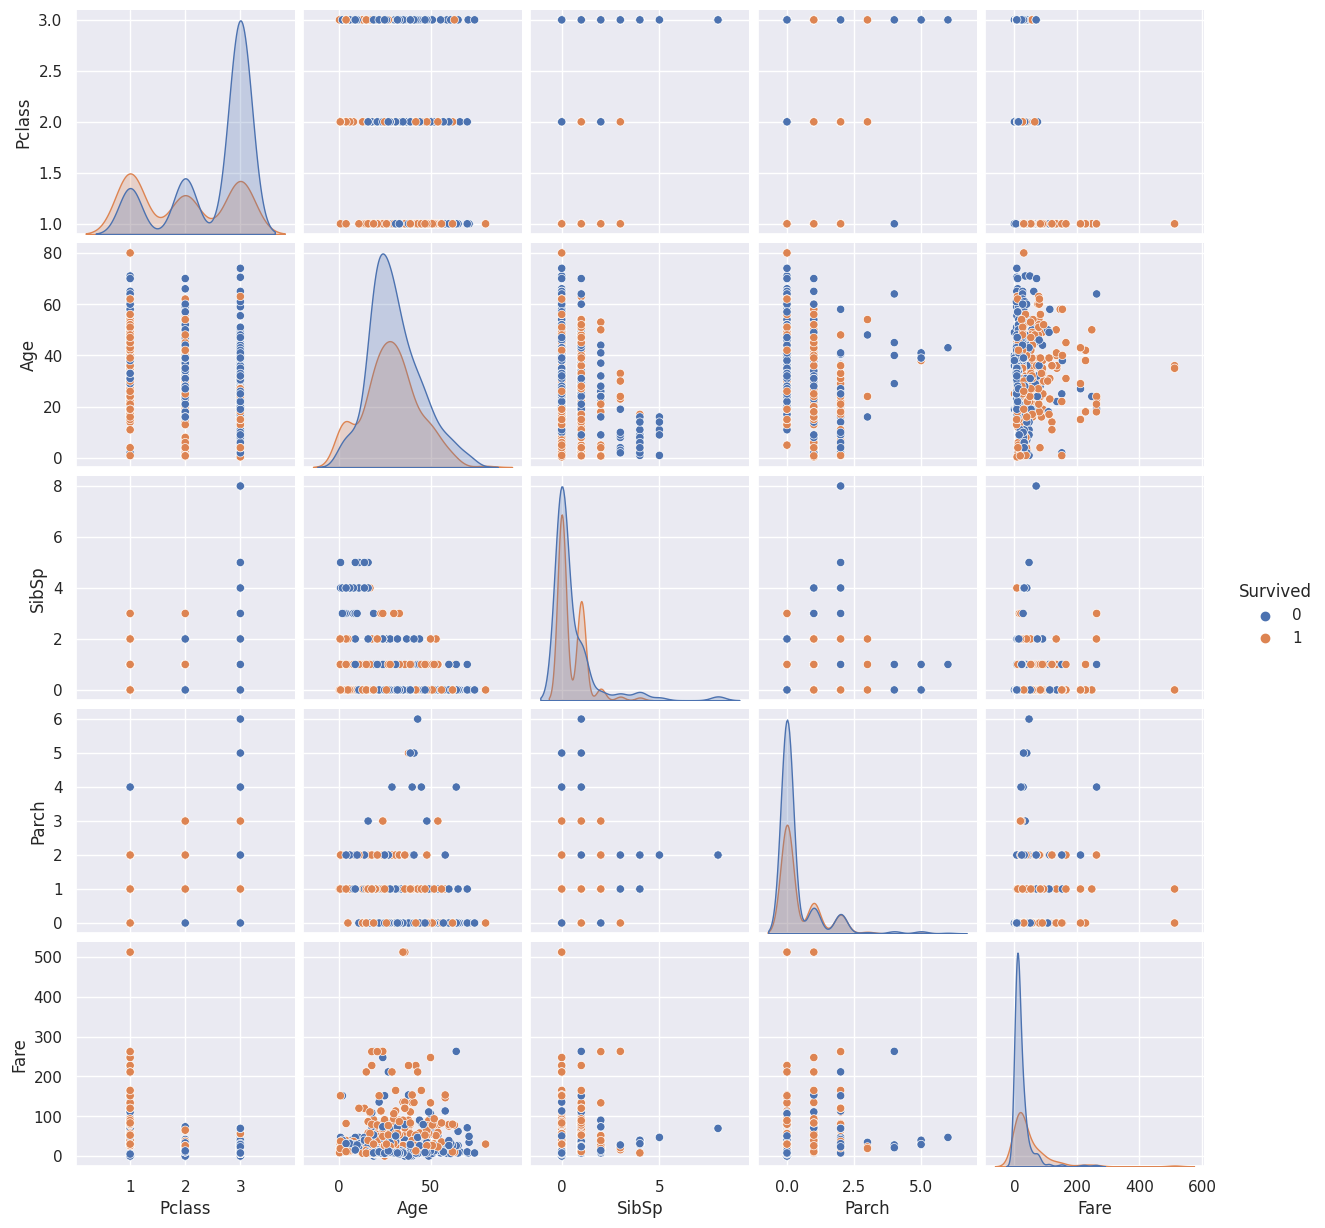

In [95]:
#Plotting the Numerical columns in pair plot for overall understanding
sns.set()
sns.pairplot(Train,hue='Survived')
plt.show()

In [96]:
#Generating a categorical column of survival status for visualization and plotting purpose
Train['Survival']=['Yes' if i==1 else 'No' for i in Train['Survived']]

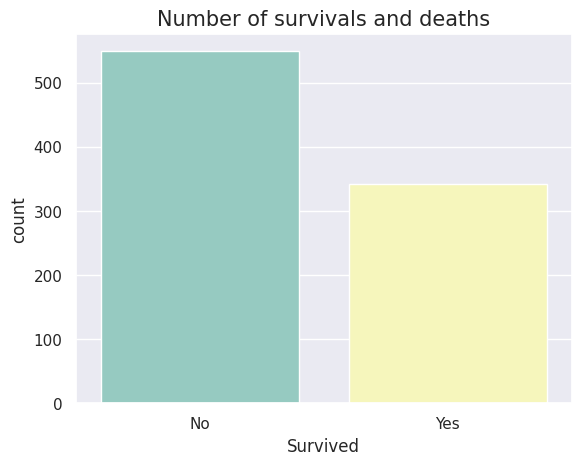

In [97]:
sns.set()
plt.title('Number of survivals and deaths',fontsize=15)
sns.countplot(x='Survived',data=Train,palette='Set3')
plt.xticks(ticks=[0,1],labels=['No','Yes'])
plt.show()

In [98]:
Train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

From the above graph it is clear that not many persons survived. Out of 891 persons in training dataset only 342, 38.4% of total training dataset survived.

In [99]:
Train.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

It is clear that 233 female survived out of 344. And out of 577 male 109 survived. The survival ratio of female is much greater than that of male. It can be seen clearly in following graph

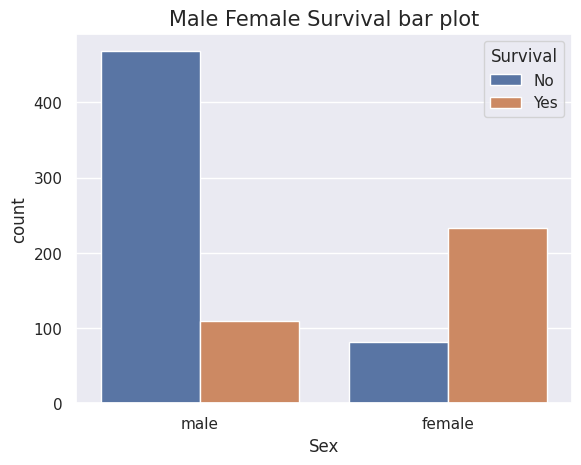

In [100]:
sns.set()
plt.title('Male Female Survival bar plot',fontsize=15)
sns.countplot(x='Sex',hue='Survival',data=Train)
plt.show()

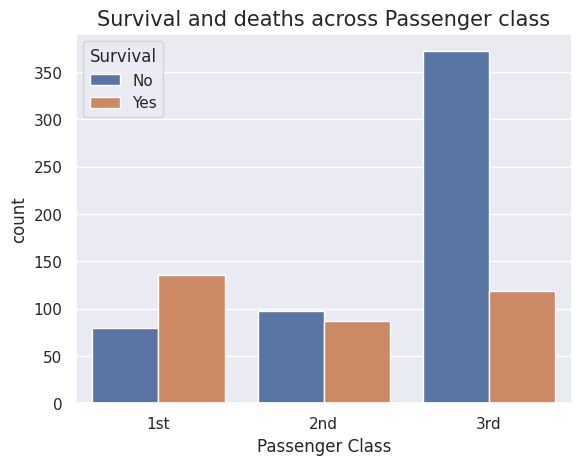

In [101]:
sns.set()
plt.title('Survival and deaths across Passenger class',fontsize=15)
sns.countplot(x='Pclass', hue='Survival', data=Train)
plt.xticks(ticks=[0,1,2],labels=['1st','2nd','3rd'])
plt.xlabel('Passenger Class')
plt.show()

The Death is highest among the Class 3 passengers. So simply those who paid highest were given highest priortiy at the time of survival

<Figure size 1000x800 with 0 Axes>

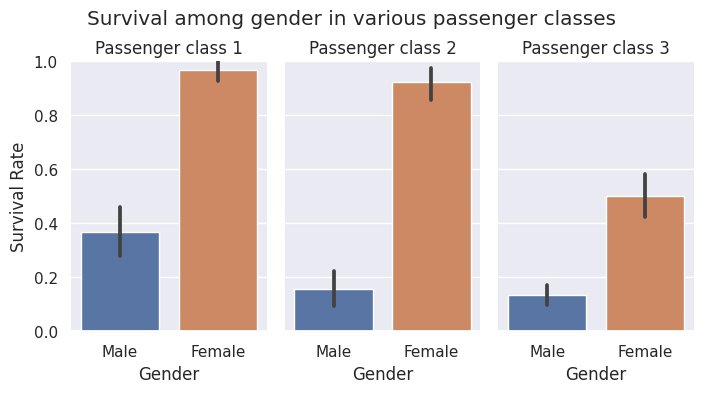

In [102]:
#Combining the above two plots in single cat plot
sns.set()
plt.figure(figsize=(10,8))
g = sns.catplot(
    data=Train, x="Sex", y="Survived", col="Pclass",
    kind="bar", height=4, aspect=.6,
)
g.fig.subplots_adjust(top=0.85)
g.fig.suptitle("Survival among gender in various passenger classes")
g.set_axis_labels("Gender", "Survival Rate")
g.set_xticklabels(["Male", "Female"])
g.set_titles("Passenger class {col_name}")
g.set(ylim=(0, 1))
g.despine(left=True)

So in every classes Females survived more

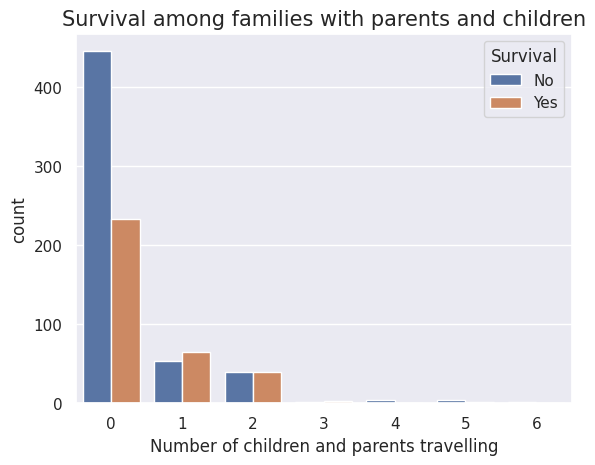

In [103]:
sns.set()
plt.title('Survival among families with parents and children',fontsize=15)
sns.countplot(x='Parch',hue='Survival',data=Train)
plt.xlabel('Number of children and parents travelling')
plt.show()

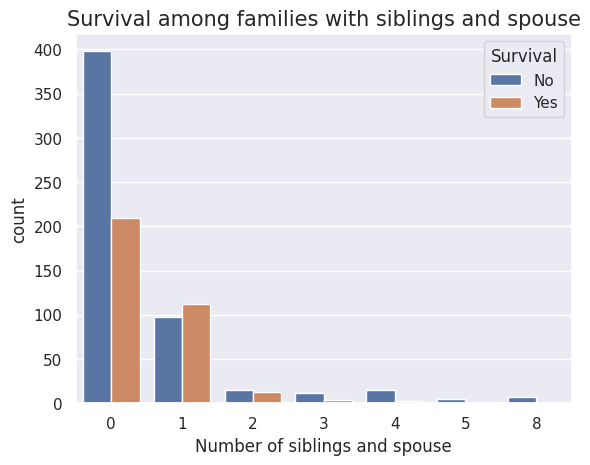

In [104]:
plt.title('Survival among families with siblings and spouse',fontsize=15)
sns.countplot(x='SibSp',hue='Survival',data=Train)
plt.xlabel('Number of siblings and spouse')
plt.show()

We see survival rate is comparatively higher for those who are travelling with families than alone

In [105]:
#We can merge the SibSp and Parch column to single column as Number of Family members
Train['Number of Family members']=Train['Parch']+Train['SibSp']
Train[['Number of Family members','Parch','SibSp']]

,Number of Family members,Parch,SibSp
0,1,0,1
1,1,0,1
2,0,0,0
3,1,0,1
4,0,0,0
...,...,...,...
886,0,0,0
887,0,0,0
888,3,2,1
889,0,0,0


In [106]:
#Dropping Parch and SibSp
Train.drop('Parch',axis=1,inplace=True)
Train.drop('SibSp',axis=1,inplace=True)

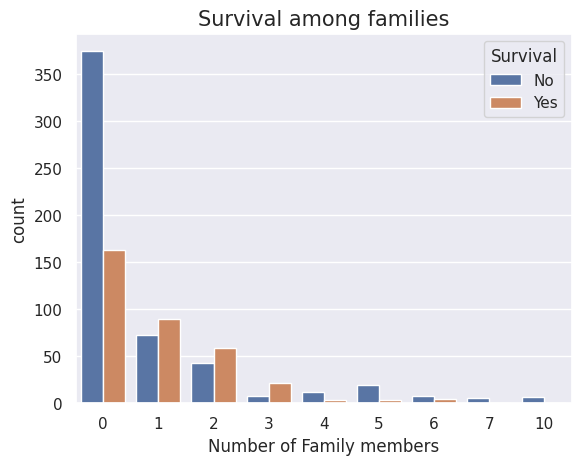

In [107]:
plt.title('Survival among families',fontsize=15)
sns.countplot(x='Number of Family members',hue='Survival',data=Train)
plt.show()

In [108]:
Train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Survived                  891 non-null    int64  
 1   Pclass                    891 non-null    int64  
 2   Sex                       891 non-null    object 
 3   Age                       714 non-null    float64
 4   Fare                      891 non-null    float64
 5   Cabin                     204 non-null    object 
 6   Embarked                  889 non-null    object 
 7   Survival                  891 non-null    object 
 8   Number of Family members  891 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 62.8+ KB


<ipython-input-109-473a0c915f40>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Cor=Train.corr()


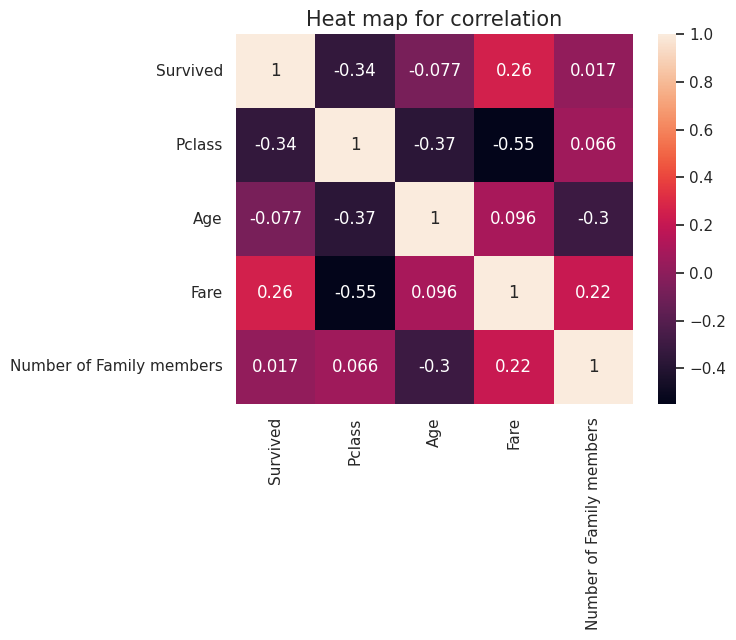

In [109]:
#Correlation plot
Cor=Train.corr()
sns.heatmap(Cor,annot=True)
plt.title("Heat map for correlation",fontsize=15)
plt.show()

In [110]:
#The numerical features are less correlated

##Handling Missing Values

##Embarked Column

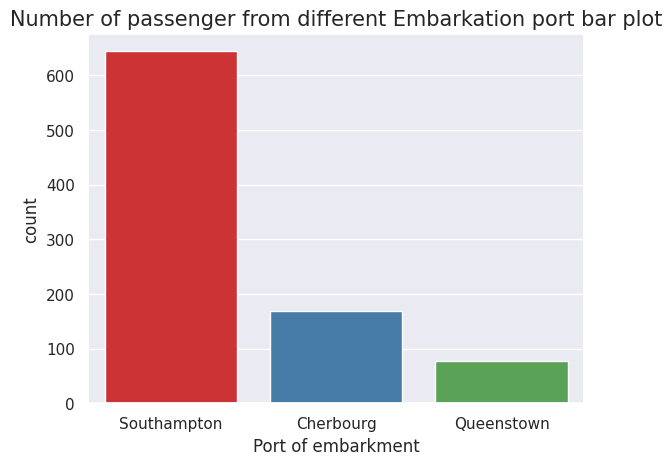

In [111]:
sns.set()
labels=['Southampton','Cherbourg','Queenstown']
plt.title('Number of passenger from different Embarkation port bar plot',fontsize=15)
sns.countplot(x='Embarked', data=Train, palette='Set1')
plt.xticks(ticks=[0,1,2],labels=labels)
plt.xlabel("Port of embarkment")
plt.show()

We see Most of the pax boarded from S (=Southampton) > C (=Cherbourg) > Q (=Queenstown). So it make sense to replace the missing values with S

In [112]:
Train['Embarked'].fillna('S',inplace=True)

##Cabin

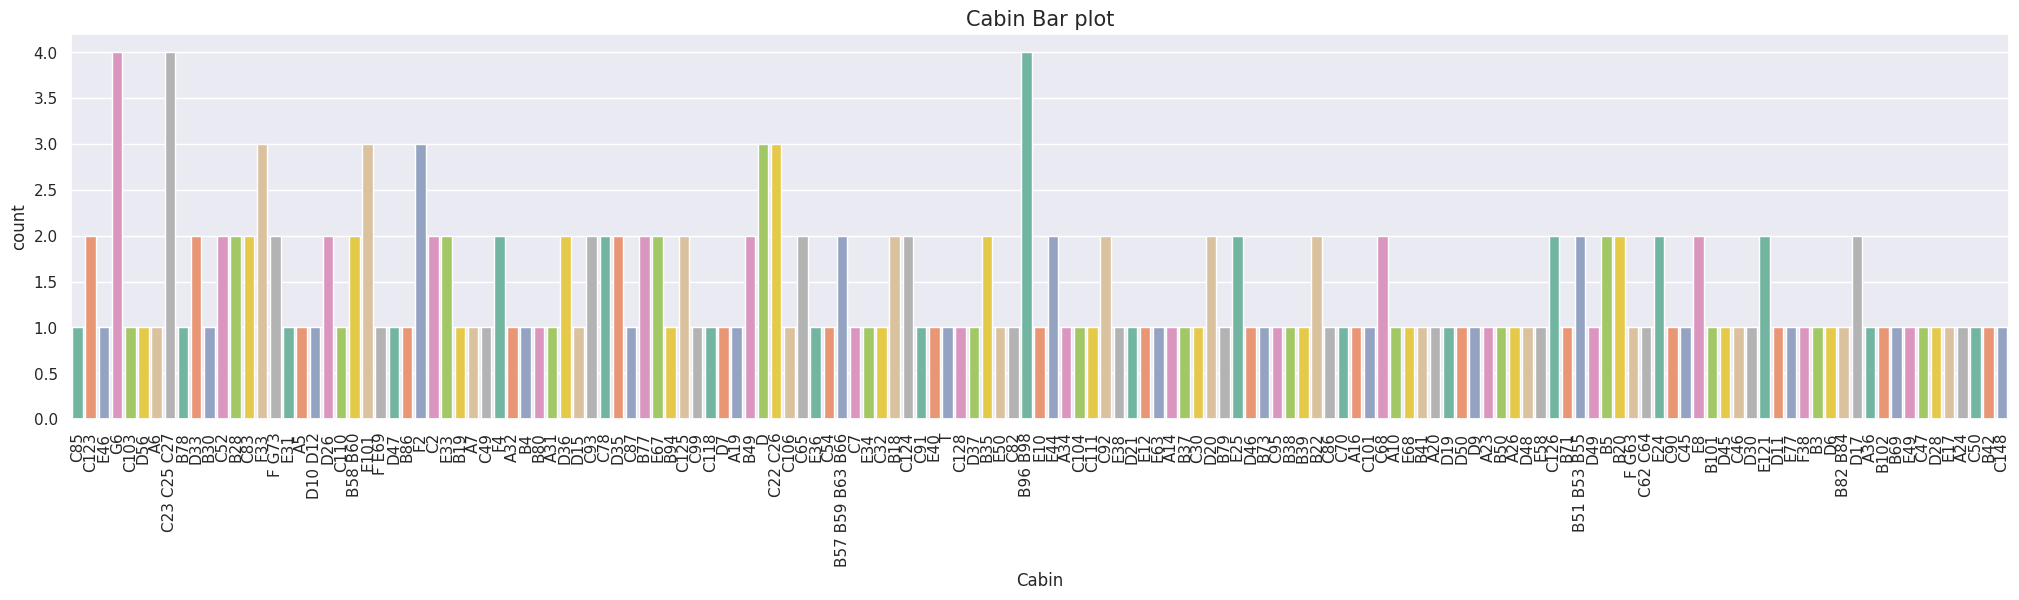

In [113]:
plt.figure(figsize=(25,5))
plt.title('Cabin Bar plot',fontsize=15)
sns.countplot(x='Cabin',data=Train,palette='Set2')
plt.xticks(rotation=90)
plt.show()

In [114]:
Train[['Survived','Cabin']]

,Survived,Cabin
0,0,NaN
1,1,C85
2,1,NaN
3,1,C123
4,0,NaN
...,...,...
886,0,NaN
887,1,B42
888,0,NaN
889,1,C148


In [115]:
print('Number of missing entries in Cabin :',Train['Cabin'].isna().sum())
#Looking at the distribution and number of missing entries we can state that there can't be any
#information as such can be retrieved from this column. Also becasue it is categorical column drawing conclusion will be difficult. It's distribution is not same as of embarked column
#So dropping this column is better
Train.drop('Cabin',axis=1,inplace=True)

Number of missing entries in Cabin : 687


In [116]:
Train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Survived                  891 non-null    int64  
 1   Pclass                    891 non-null    int64  
 2   Sex                       891 non-null    object 
 3   Age                       714 non-null    float64
 4   Fare                      891 non-null    float64
 5   Embarked                  891 non-null    object 
 6   Survival                  891 non-null    object 
 7   Number of Family members  891 non-null    int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 55.8+ KB


In [117]:
#We will one hot encode Pclass, Sex, Embarked
Embarked=Train['Embarked']
One_h_Train=pd.get_dummies(Train, columns=["Pclass","Embarked","Sex"])
One_h_Train.drop('Sex_female', axis=1, inplace=True)

In [118]:
One_h_Train.head()

,Survived,Age,Fare,Survival,Number of Family members,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_male
0,0,22.0,7.2500,No,1,0,0,1,0,0,1,1
1,1,38.0,71.2833,Yes,1,1,0,0,1,0,0,0
2,1,26.0,7.9250,Yes,0,0,0,1,0,0,1,0
3,1,35.0,53.1000,Yes,1,1,0,0,0,0,1,0
4,0,35.0,8.0500,No,0,0,0,1,0,0,1,1


In [119]:
Oh_rep=pd.DataFrame({"Emabarked":Embarked,"Embarked_C":One_h_Train["Embarked_C"],"Embarked_Q":One_h_Train["Embarked_Q"],"Embarked_S":One_h_Train["Embarked_S"]})

In [120]:
Data=Oh_rep.head()
Data.to_csv("Data.csv")

In [121]:
Target=One_h_Train.pop('Survived')
One_h_Train.drop('Survival',axis=1,inplace=True)

##Age column

With skewed data median imputation is good choice. Mean imputation works well with near normal distributions. For Categorical columns Mode Imputation method is the appropriate method. But here we will use KNN for imputation purpose

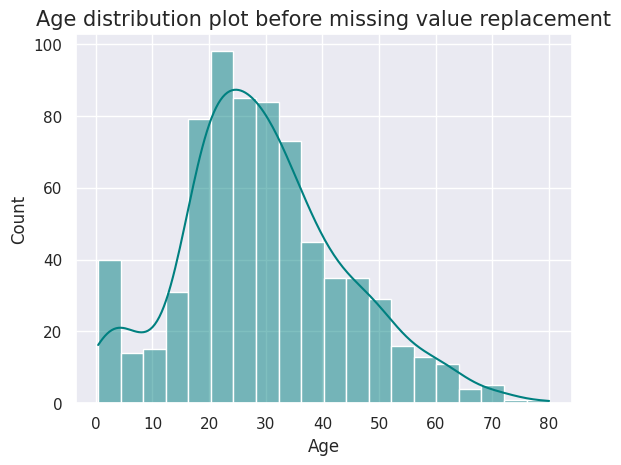

In [122]:
sns.set()
sns.histplot(data=One_h_Train,x='Age',kde=True,color='teal')
plt.title("Age distribution plot before missing value replacement",fontsize=15)
plt.show()

In [123]:
cols=One_h_Train.columns
age_imputer=KNNImputer(n_neighbors=3)
Imputer_age=age_imputer.fit_transform(One_h_Train)

In [124]:
One_h_Train['Age']=Imputer_age[:,0]

In [125]:
merged_data=pd.concat([One_h_Train,Train['Survival']],axis=1)

In [126]:
merged_data

,Age,Fare,Number of Family members,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_male,Survival
0,22.000000,7.2500,1,0,0,1,0,0,1,1,No
1,38.000000,71.2833,1,1,0,0,1,0,0,0,Yes
2,26.000000,7.9250,0,0,0,1,0,0,1,0,Yes
3,35.000000,53.1000,1,1,0,0,0,0,1,0,Yes
4,35.000000,8.0500,0,0,0,1,0,0,1,1,No
...,...,...,...,...,...,...,...,...,...,...,...
886,27.000000,13.0000,0,0,1,0,0,0,1,1,No
887,19.000000,30.0000,0,1,0,0,0,0,1,0,Yes
888,21.333333,23.4500,3,0,0,1,0,0,1,0,No
889,26.000000,30.0000,0,1,0,0,1,0,0,1,Yes


In [127]:
One_h_Train.describe()

,Age,Fare,Number of Family members,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_male
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,30.057243,32.204208,0.904602,0.242424,0.206510,0.551066,0.188552,0.086420,0.725028,0.647587
std,13.834869,49.693429,1.613459,0.428790,0.405028,0.497665,0.391372,0.281141,0.446751,0.477990
min,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,21.000000,7.910400,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,29.000000,14.454200,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000
75%,38.000000,31.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,80.000000,512.329200,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


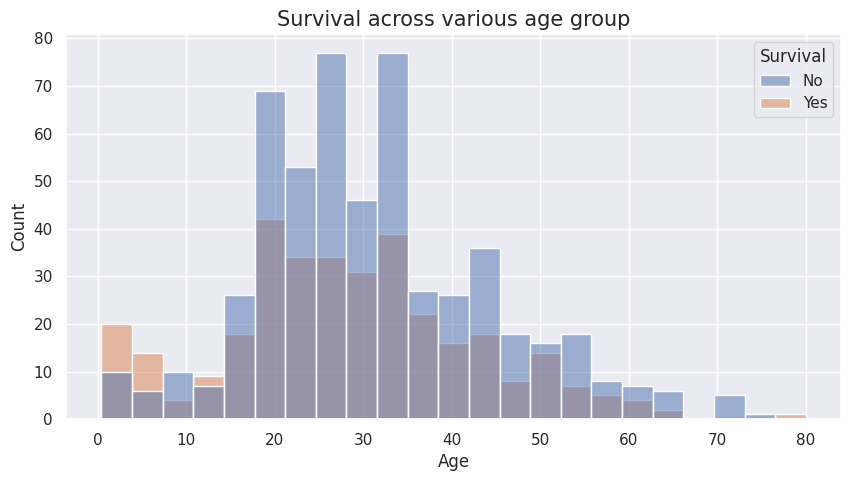

In [128]:
plt.figure(figsize=(10,5))
plt.title("Survival across various age group",fontsize=15)
ax=sns.histplot(x='Age',hue='Survival',data=merged_data)
plt.show()

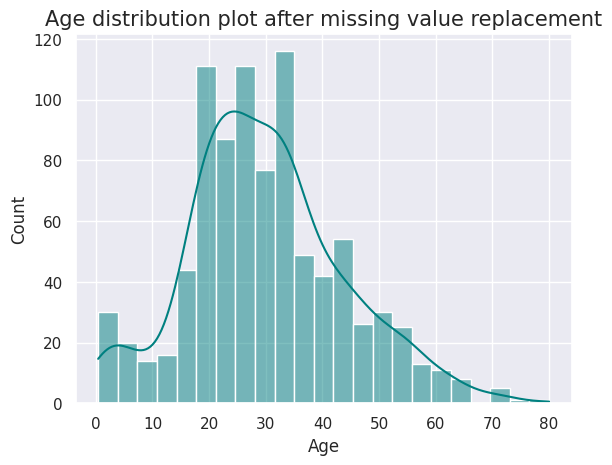

In [129]:
sns.set()
sns.histplot(data=One_h_Train,x='Age',kde=True,color='teal')
plt.title("Age distribution plot after missing value replacement",fontsize=15)
plt.show()

In [130]:
One_h_Train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       891 non-null    float64
 1   Fare                      891 non-null    float64
 2   Number of Family members  891 non-null    int64  
 3   Pclass_1                  891 non-null    uint8  
 4   Pclass_2                  891 non-null    uint8  
 5   Pclass_3                  891 non-null    uint8  
 6   Embarked_C                891 non-null    uint8  
 7   Embarked_Q                891 non-null    uint8  
 8   Embarked_S                891 non-null    uint8  
 9   Sex_male                  891 non-null    uint8  
dtypes: float64(2), int64(1), uint8(7)
memory usage: 27.1 KB


In [131]:
X_train,X_val,y_train,y_val=train_test_split(One_h_Train,Target,shuffle=False,random_state=20,test_size=0.15)#Split the data on Train and validation set
S=MinMaxScaler()
X_train_sc=S.fit_transform(X_train)#Scale the data between 0 and 1
X_val_sc=S.transform(X_val)

In [132]:
lr=LogisticRegression(max_iter=20000,verbose=1)
lr.fit(X_train_sc,y_train)#Fit the sklearn's logistic regression model with 20000 iterations

LogisticRegression(max_iter=20000, verbose=1)

In [133]:
print("Accuracy on Train set :",lr.score(X_train_sc,y_train))

Accuracy on Train set : 0.8018494055482166


In [134]:
print("Accuracy on Validation set :",lr.score(X_val_sc,y_val))

Accuracy on Validation set : 0.835820895522388


In [135]:
yhat_val=lr.predict(X_val_sc)#Predict for the validation set

##Model evaluation and Result visualization

In [136]:
print(classification_report(y_val,yhat_val))

              precision    recall  f1-score   support

           0       0.86      0.90      0.88        87
           1       0.79      0.72      0.76        47

    accuracy                           0.84       134
   macro avg       0.82      0.81      0.82       134
weighted avg       0.83      0.84      0.83       134



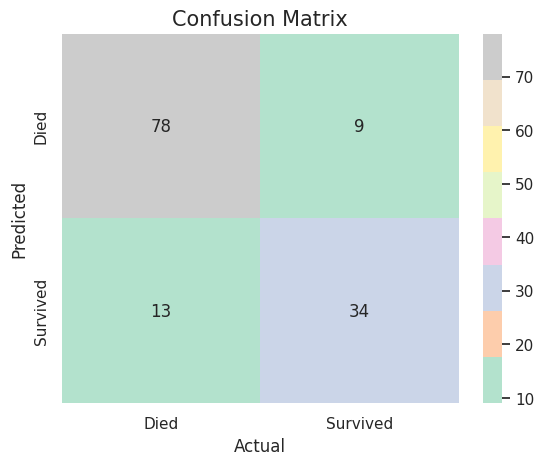

In [137]:
#Get the confusion matrix on validation set
cm=confusion_matrix(y_val,yhat_val)
plt.title("Confusion Matrix",fontsize=15)
sns.heatmap(cm,annot=True,cmap='Pastel2',fmt='d')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.xticks(ticks=[0.5,1.5],labels=['Died','Survived'])
plt.yticks(ticks=[0.5,1.5],labels=['Died','Survived'])
plt.show()

##True Positive=34 (Actual survived, predicted survived)
##False Positive=13 (Actual died, predicted survived)
##False Negetive=9 (Actual survived, predicted died)
##True Negative=78 (Actual died, predicted died)

##Checking ROC

In [138]:
yhat_val_prob=lr.predict_proba(X_val_sc)[:,1]
fpr,tpr,threshold=roc_curve(y_val,yhat_val_prob)
print("Area of ROC is",auc(fpr,tpr))

Area of ROC is 0.8657373440939105


An AU ROC more than 0.5 indicates a working model. Above 0.9 is an excellent model. for between 0.8 and 0.9 is considered a good model. Below 0.7 is inferior. So our model is fair enough

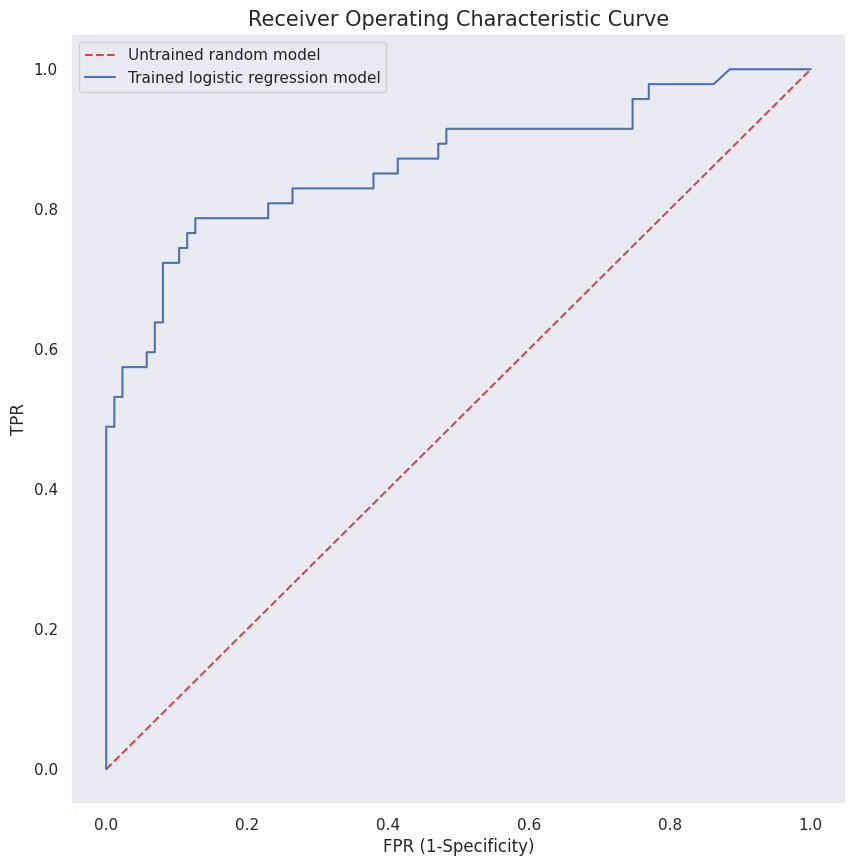

In [139]:
plt.figure(figsize=(10,10))
plt.plot([0,1],[0,1],'r--',label='Untrained random model')
plt.plot(fpr,tpr,label='Trained logistic regression model')
plt.title("Receiver Operating Characteristic Curve",fontsize=15)
plt.ylabel("TPR")
plt.xlabel("FPR (1-Specificity)")
plt.legend()
plt.grid()
plt.show()

##Get the model weights

In [140]:
print("Weights are : ",lr.coef_[0])
print("bias is : ",lr.intercept_)

Weights are :  [-1.98242932  0.35223883 -1.21820287  0.95877205  0.15245472 -1.11013195
  0.09143266  0.18797324 -0.27831107 -2.48461359]
bias is :  [2.33212083]


##Prediction on test set
follow the same steps as done on train set

In [141]:
Test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


We will follow the same data preprocessing technique as before we did in train set


In [142]:
#Dropping Cabin column in the test set
Test.drop('Cabin',axis=1,inplace=True)
Test.drop('Ticket',axis=1,inplace=True)

In [143]:
Test['Number of Family members']=Test['Parch']+Test['SibSp']# add the correlated 'Parch' and 'SibSp' column to one single column
Test.drop('Parch',axis=1,inplace=True)
Test.drop('SibSp',axis=1,inplace=True)

In [144]:
ID_test=Test.pop('PassengerId')
Name_test=Test.pop('Name')

In [145]:
Test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pclass                    418 non-null    int64  
 1   Sex                       418 non-null    object 
 2   Age                       332 non-null    float64
 3   Fare                      417 non-null    float64
 4   Embarked                  418 non-null    object 
 5   Number of Family members  418 non-null    int64  
dtypes: float64(2), int64(2), object(2)
memory usage: 19.7+ KB


In [146]:
#Converting to one hot encoding
One_h_Test=pd.get_dummies(Test, columns=["Pclass","Embarked","Sex"])
One_h_Test.drop('Sex_female', axis=1, inplace=True)

In [147]:
One_h_Test.columns

Index(['Age', 'Fare', 'Number of Family members', 'Pclass_1', 'Pclass_2',
       'Pclass_3', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Sex_male'],
      dtype='object')

In [148]:
imputer=KNNImputer(n_neighbors=3)
Imputer=imputer.fit_transform(One_h_Test)
One_h_Test['Age']=Imputer[:,0]
One_h_Test['Fare']=Imputer[:,1]

In [149]:
One_h_Test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       418 non-null    float64
 1   Fare                      418 non-null    float64
 2   Number of Family members  418 non-null    int64  
 3   Pclass_1                  418 non-null    uint8  
 4   Pclass_2                  418 non-null    uint8  
 5   Pclass_3                  418 non-null    uint8  
 6   Embarked_C                418 non-null    uint8  
 7   Embarked_Q                418 non-null    uint8  
 8   Embarked_S                418 non-null    uint8  
 9   Sex_male                  418 non-null    uint8  
dtypes: float64(2), int64(1), uint8(7)
memory usage: 12.8 KB


In [150]:
#Scale the data
X_test_Test=S.transform(One_h_Test)

In [151]:
Survival=lr.predict(X_test_Test)#Make prediction on the test set

In [152]:
Test['Survived']=Survival
Test['Survival']=['Yes' if i==1 else 'No' for i in Survival]#Make a catogorical survival column for plotting purpose

In [153]:
Test['Survived'].value_counts()# in the test set we are finding only 9 people survived

0    265
1    153
Name: Survived, dtype: int64

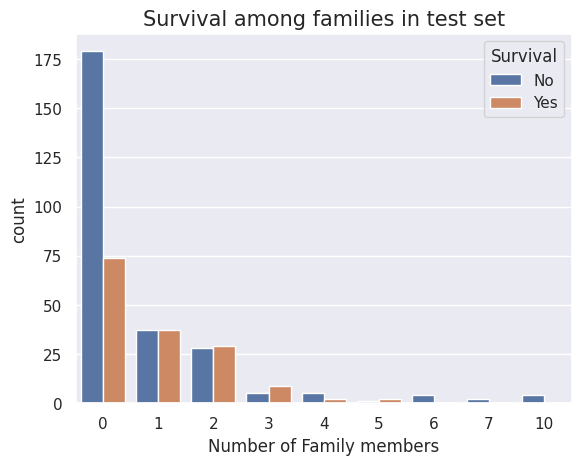

In [154]:
plt.title('Survival among families in test set',fontsize=15)#Obtaining the survival for families in the test set
sns.countplot(x='Number of Family members',hue='Survival',data=Test)
plt.show()

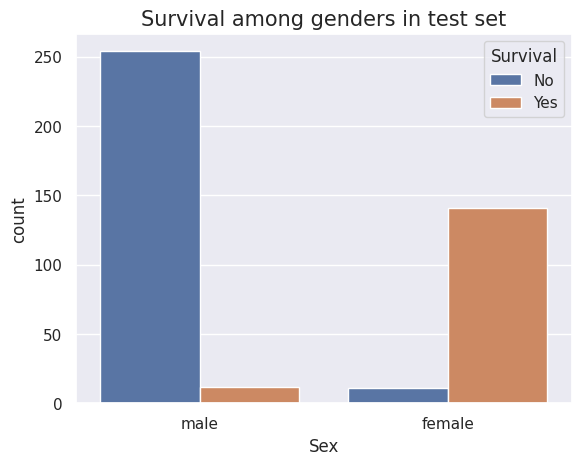

In [155]:
plt.title('Survival among genders in test set',fontsize=15)# Check the gender based survival rate
sns.countplot(x='Sex',hue='Survival',data=Test)
plt.show()

In [156]:
Test[(Test['Sex']=='female') & (Test['Survived']==1)]['Survived'].sum()

141

##Out of 153 survivals 141 are females

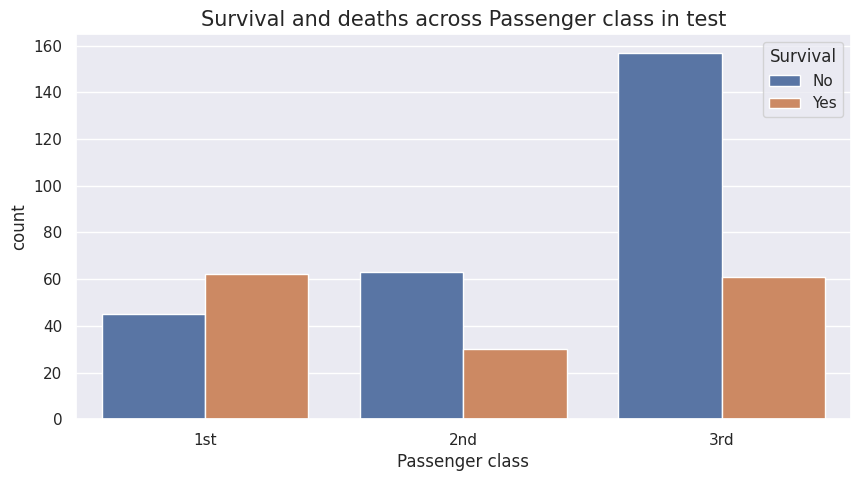

In [157]:
plt.figure(figsize=(10,5))
plt.title("Survival and deaths across Passenger class in test",fontsize=15)
ax=sns.countplot(x='Pclass',hue='Survival',data=Test)
plt.xticks(ticks=[0,1,2],labels=['1st','2nd','3rd'])
plt.xlabel('Passenger class')
plt.show()

In [158]:
print("Number of survivals in 1st class ",Test[(Test['Pclass']==1) & (Test['Survived']==1)]['Survived'].sum())
print("Number of deaths in 1st class ",len(Test[(Test['Pclass']==1) & (Test['Survived']==0)]['Survived']))
print("Number of survivals in 2nd class ",Test[(Test['Pclass']==2) & (Test['Survived']==1)]['Survived'].sum())
print("Number of deaths in 2nd class ",len(Test[(Test['Pclass']==2) & (Test['Survived']==0)]['Survived']))
print("Number of survivals in 3rd class ",Test[(Test['Pclass']==3) & (Test['Survived']==1)]['Survived'].sum())
print("Number of deaths in 3rd class ",len(Test[(Test['Pclass']==3) & (Test['Survived']==0)]['Survived']))

Number of survivals in 1st class  62
Number of deaths in 1st class  45
Number of survivals in 2nd class  30
Number of deaths in 2nd class  63
Number of survivals in 3rd class  61
Number of deaths in 3rd class  157


So maximum number of deaths are from 3rd Class only

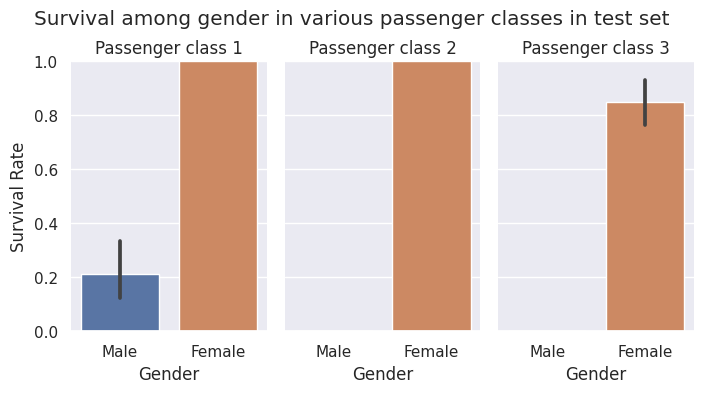

In [159]:
g = sns.catplot(
    data=Test, x="Sex", y="Survived", col="Pclass",
    kind="bar", height=4, aspect=.6,
)
g.fig.subplots_adjust(top=0.85)
g.fig.suptitle("Survival among gender in various passenger classes in test set")
g.set_axis_labels("Gender", "Survival Rate")
g.set_xticklabels(["Male", "Female"])
g.set_titles("Passenger class {col_name}")
g.set(ylim=(0, 1))
g.despine(left=True)
plt.show()

From 2nd and 3rd class no males survived. So only male survivals are from 1st class. Money matters !

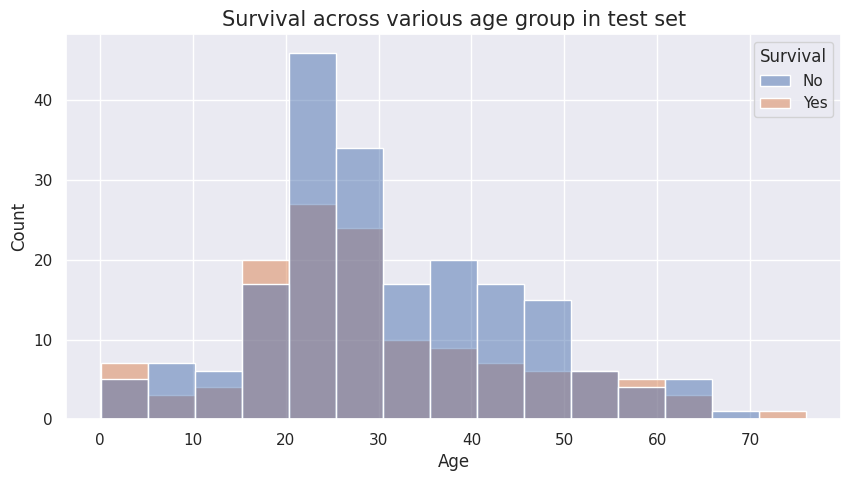

In [160]:
plt.figure(figsize=(10,5))
plt.title("Survival across various age group in test set",fontsize=15)
ax=sns.histplot(x='Age',hue='Survival',data=Test)
plt.show()

#End of Code